### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

The company wants to know:
● Which variables are significant in predicting the demand for shared bikes. ● How well those variables describe the bike demands

### Importing and Understanding Data

In [8]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [9]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data from CSV

In [10]:
#Reading data
BoomBikes=pd.read_csv("day.csv")
BoomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Routine checks of data

In [11]:
#shape of the BoomBikes data
BoomBikes.shape

(730, 16)

In [12]:
#checking null values in the data
BoomBikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no null values in the data

In [13]:
#info of data
BoomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [14]:
#describtion of data
BoomBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Dropping the unnecessary variables " instant, casual, registered and dteday" column from the data set

In [15]:
#Dropping the unnecessary variables
BoomBikes.drop(['instant', 'casual','registered','dteday'], axis = 1,inplace=True)

In [16]:
BoomBikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [17]:
BoomBikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [18]:
# Converting feature variable with categorical variable with the specific variable mentioned in the assignment dictionary
BoomBikes.season= BoomBikes.season.replace(1, "spring")
BoomBikes.season= BoomBikes.season.replace(2, "summer")
BoomBikes.season= BoomBikes.season.replace(3, "fall")
BoomBikes.season= BoomBikes.season.replace(4, "winter")

In [19]:
# Checking value count after converting
BoomBikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [20]:
BoomBikes.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [21]:
# Converting feature variable with categorical variable with the specific variable mentioned in the assignment dictionary
BoomBikes.mnth= BoomBikes.mnth.replace(1, "january")
BoomBikes.mnth= BoomBikes.mnth.replace(2, "february")
BoomBikes.mnth= BoomBikes.mnth.replace(3, "march")
BoomBikes.mnth= BoomBikes.mnth.replace(4, "april")
BoomBikes.mnth= BoomBikes.mnth.replace(5, "may")
BoomBikes.mnth= BoomBikes.mnth.replace(6, "june")
BoomBikes.mnth= BoomBikes.mnth.replace(7, "july")
BoomBikes.mnth= BoomBikes.mnth.replace(8, "august")
BoomBikes.mnth= BoomBikes.mnth.replace(9, "september")
BoomBikes.mnth= BoomBikes.mnth.replace(10, "october")
BoomBikes.mnth= BoomBikes.mnth.replace(11, "november")
BoomBikes.mnth= BoomBikes.mnth.replace(12, "december")

In [22]:
# Checking value count after converting
BoomBikes.mnth.value_counts()

march        62
january      62
august       62
may          62
july         62
december     62
october      62
september    60
june         60
november     60
april        60
february     56
Name: mnth, dtype: int64

In [23]:
BoomBikes.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [24]:
# Converting feature variable with categorical variable with the specific variable mentioned in the assignment dictionary
BoomBikes.weekday= BoomBikes.weekday.replace(0, "sunday")
BoomBikes.weekday= BoomBikes.weekday.replace(1, "monday")
BoomBikes.weekday= BoomBikes.weekday.replace(2, "tuesday")
BoomBikes.weekday= BoomBikes.weekday.replace(3, "wednesday")
BoomBikes.weekday= BoomBikes.weekday.replace(4, "thrusday")
BoomBikes.weekday= BoomBikes.weekday.replace(5, "friday")
BoomBikes.weekday= BoomBikes.weekday.replace(6, "saturday")


In [25]:
# Checking value count after converting
BoomBikes.weekday.value_counts() 

saturday     105
monday       105
sunday       105
thrusday     104
tuesday      104
friday       104
wednesday    103
Name: weekday, dtype: int64

In [26]:
BoomBikes.weathersit.value_counts() 

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [27]:
# Converting feature variable with categorical variable with the specific variable mentioned in the assignment dictionary
BoomBikes.weathersit= BoomBikes.weathersit.replace(1, "Clear, Few clouds, Partly cloudy, Partly cloudy")
BoomBikes.weathersit= BoomBikes.weathersit.replace(2, "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist")
BoomBikes.weathersit= BoomBikes.weathersit.replace(3, "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds")
BoomBikes.weathersit= BoomBikes.weathersit.replace(4, "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog")

In [28]:
BoomBikes.weathersit.value_counts() 

Clear, Few clouds, Partly cloudy, Partly cloudy                                            463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     21
Name: weathersit, dtype: int64

In [29]:
# checking info of the data after data preprocess step
BoomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


Here you can see season, mnth, weekday and weathersit columns are now converted into object type

In [30]:
# Data after all the required conversion
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


In [31]:
#describe
BoomBikes.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


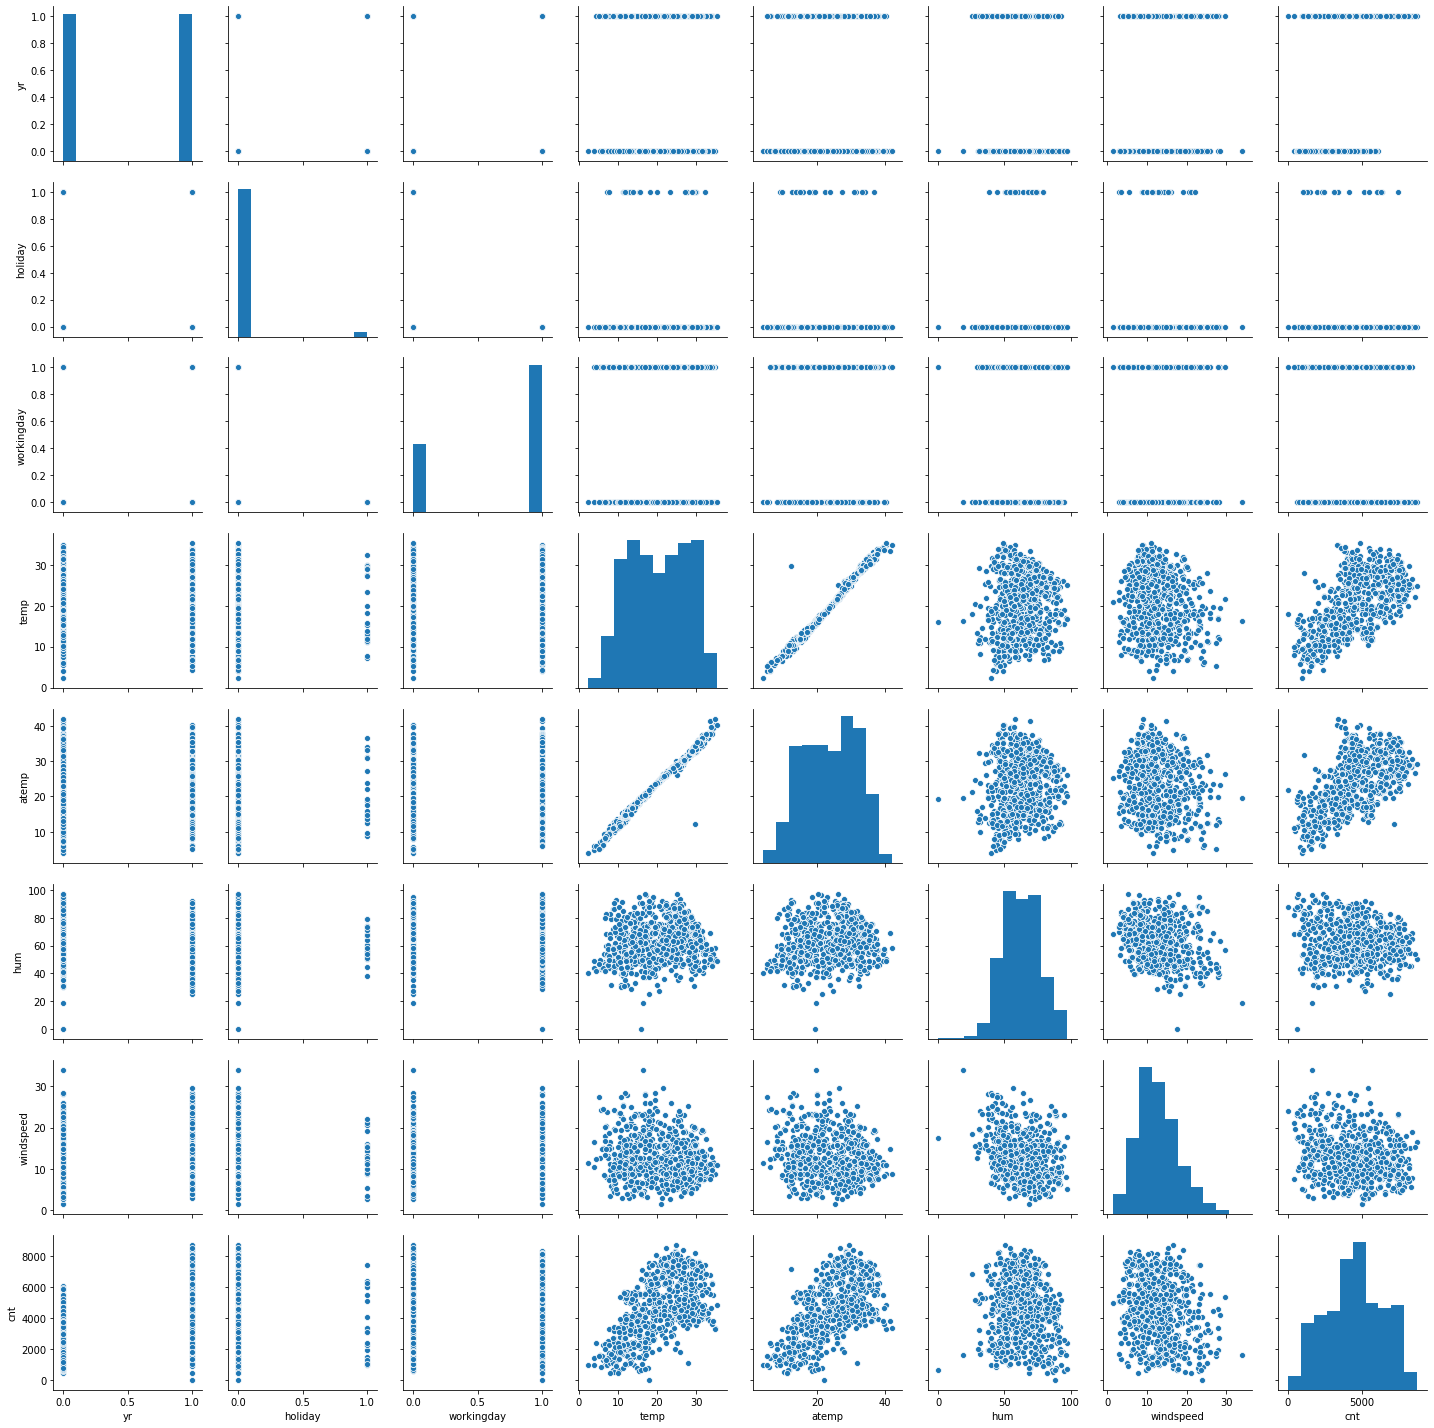

In [32]:
#visualising the numeric variables
sns.pairplot(BoomBikes)
plt.show()

From the above pairplot visualisation,we found that temp and atemp column are linearly correlated with cnt

##### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables

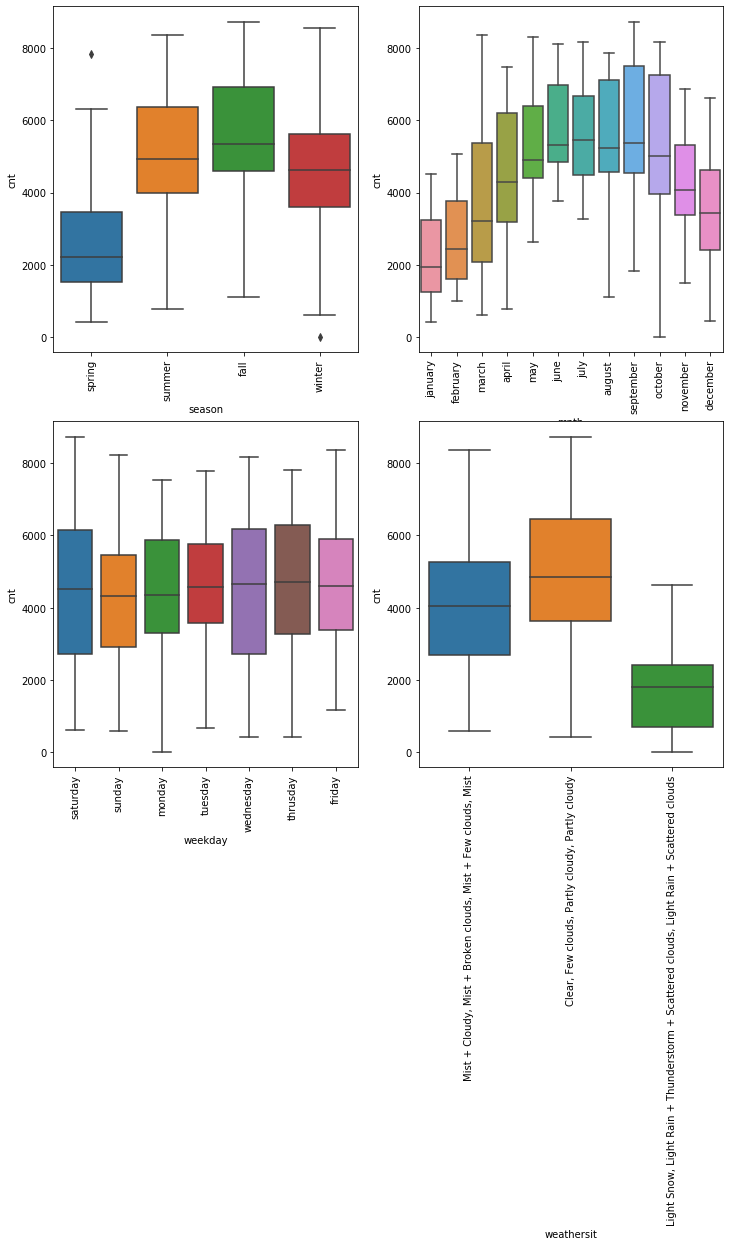

In [33]:
#visualising the categorical variables
plt.figure(figsize=(12,14))
plt.subplot(2,2,1)
sns.boxplot(x='season',y='cnt',data=BoomBikes)
plt.xticks(rotation=90) 
plt.subplot(2,2,2)
sns.boxplot(x='mnth',y='cnt',data=BoomBikes)
plt.xticks(rotation=90) 
plt.subplot(2,2,3)
sns.boxplot(x='weekday',y='cnt',data=BoomBikes)
plt.xticks(rotation=90) 
plt.subplot(2,2,4)
sns.boxplot(x='weathersit',y='cnt',data=BoomBikes)
plt.xticks(rotation=90) 
plt.show()

#####  Let's check the correlation coefficients to see which variables are highly correlated

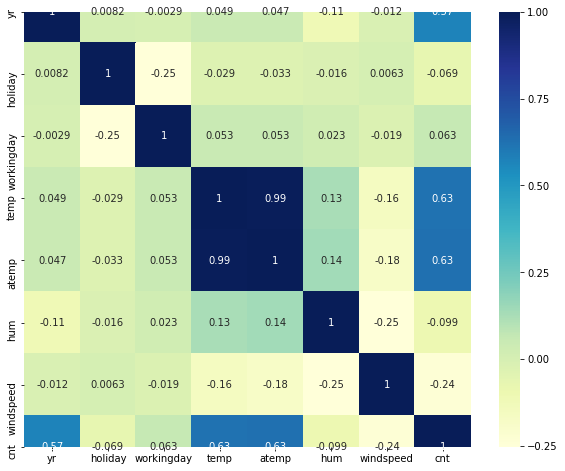

In [34]:
plt.figure(figsize=(10,8))
BoomBikes_corr=BoomBikes.corr()
sns.heatmap(BoomBikes_corr,cmap="YlGnBu",annot=True)
plt.show()

temp and atemp are highly correlated with cnt

### Data Preparation

In [35]:
BoomBikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,december,0,thrusday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,december,0,friday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,december,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,december,0,sunday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",10.489153,11.58500,48.3333,23.500518,1796


In [36]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(BoomBikes['season'], drop_first = True)

In [37]:
# Add the results to the original BoomBikes dataframe

BoomBikes = pd.concat([BoomBikes, status], axis = 1)

In [38]:
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,january,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,january,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,january,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,january,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,january,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [39]:
# Creating dummy variable for mnth
status = pd.get_dummies(BoomBikes['mnth'], drop_first = True)

In [40]:
# Add the results to the original BoomBikes dataframe
BoomBikes = pd.concat([BoomBikes, status], axis = 1)

In [41]:
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,december,february,january,july,june,march,may,november,october,september
0,spring,0,january,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,january,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,january,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,january,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,january,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [42]:
# Let's drop the first column from status df using 'drop_first = True'
# Creating dummy variable for weekday
status = pd.get_dummies(BoomBikes['weekday'], drop_first = True)

In [43]:
# Add the results to the original BoomBikes dataframe

BoomBikes = pd.concat([BoomBikes, status], axis = 1)

In [44]:
# Let's drop the first column from status df using 'drop_first = True'
# Creating dummy variable for weathersit
status = pd.get_dummies(BoomBikes['weathersit'], drop_first = True)

In [45]:
# Add the results to the original BoomBikes dataframe
BoomBikes = pd.concat([BoomBikes, status], axis = 1)

In [46]:
# display all the columns after creating dummy
BoomBikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'august', 'december', 'february', 'january', 'july',
       'june', 'march', 'may', 'november', 'october', 'september', 'monday',
       'saturday', 'sunday', 'thrusday', 'tuesday', 'wednesday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [47]:
# Drop "season","mnth","weekday","weathersit" as we have created the dummies for it

BoomBikes.drop(["season","mnth","weekday","weathersit"], axis = 1, inplace = True)

In [48]:
BoomBikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thrusday,tuesday,wednesday,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
# Displaying columns names after removing "season","mnth","weekday","weathersit" this columns
BoomBikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'august', 'december', 'february',
       'january', 'july', 'june', 'march', 'may', 'november', 'october',
       'september', 'monday', 'saturday', 'sunday', 'thrusday', 'tuesday',
       'wednesday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

### Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [50]:
#importing sklearn library
import sklearn
from sklearn.model_selection import train_test_split

In [51]:
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(BoomBikes, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features 

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()

In [54]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [55]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thrusday,tuesday,wednesday,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [56]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thrusday,tuesday,wednesday,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


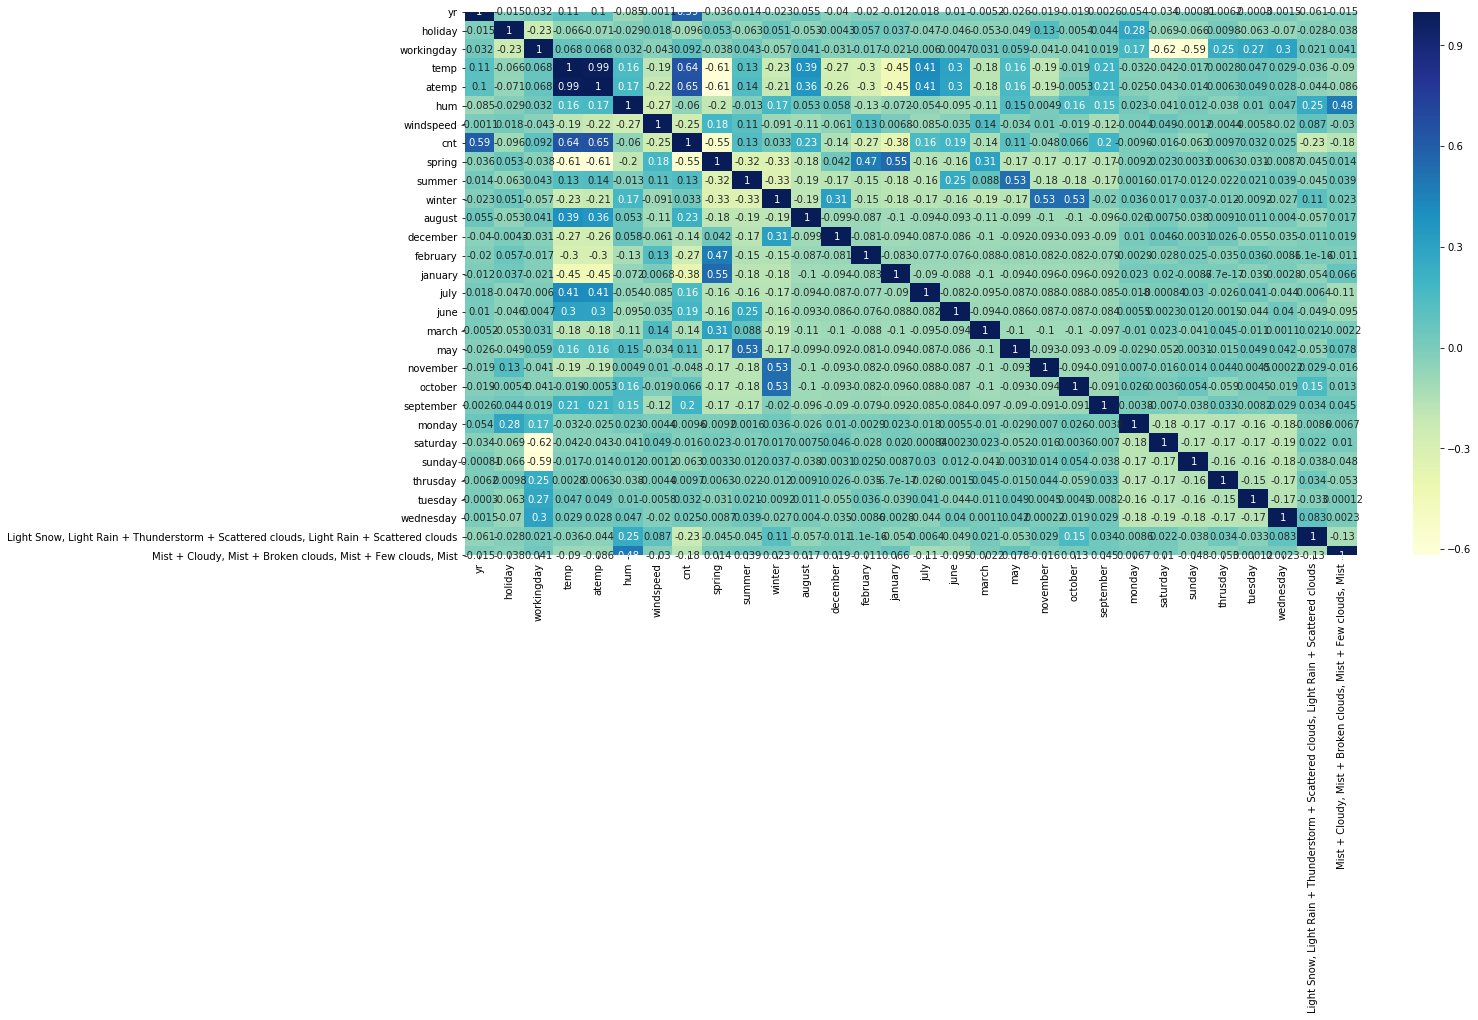

In [57]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [58]:
y_train = df_train.pop('cnt')
X_train = df_train

In [59]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [60]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('august', False, 14),
 ('december', False, 3),
 ('february', False, 4),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 5),
 ('march', False, 10),
 ('may', False, 15),
 ('november', False, 2),
 ('october', False, 13),
 ('september', True, 1),
 ('monday', False, 8),
 ('saturday', True, 1),
 ('sunday', False, 7),
 ('thrusday', False, 11),
 ('tuesday', False, 9),
 ('wednesday', False, 12),
 ('Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', True, 1)]

In [62]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'january', 'july', 'september', 'saturday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [63]:
X_train.columns[~rfe.support_]

Index(['atemp', 'august', 'december', 'february', 'june', 'march', 'may',
       'november', 'october', 'monday', 'sunday', 'thrusday', 'tuesday',
       'wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [64]:
# Creating X_train_new dataframe with RFE selected variables
X_train_new = X_train[col]

In [65]:
X_train_new.shape

(510, 15)

In [66]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                                                                                      0.251042
yr                                                                                         0.230502
holiday                                                                                   -0.058529
workingday                                                                                 0.043521
temp                                                                                       0.509836
hum                                                                                       -0.154716
windspeed                                                                                 -0.185956
spring                                                                                    -0.050806
summer                                                                                     0.049660
winter                                                                                     0.094426


In [67]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.31e-191
Time:                        19:02:39   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2510      0.036      6.949      0.000       0.180       0.322
yr                                                                                          0.2305      0.008     28.807      0.000       0.215       0.246
holiday                                                                                    -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                                                                                  0.0435      0.012      3.781      0.000       0.021       0.066
temp                                                                                        0.5098      0.034     14.851      0.000       0.442       0.577
hum                                                                                        -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                                                                                  -0.1860      0.025     -7.301      0.000      -0.236      -0.136
spring                                                                                     -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer                                                                                      0.0497      0.015      3.346      0.001       0.020       0.079
winter                                                                                      0.0944      0.017      5.479      0.000       0.061       0.128
january                                                                                    -0.0343      0.017     -1.980      0.048      -0.068      -0.000
july                                                                                       -0.0532      0.018     -2.947      0.003      -0.089      -0.018
september                                                                                   0.0812      0.016      4.934      0.000       0.049       0.114
saturday                                                                                    0.0537      0.014      3.707      0.000       0.025       0.082
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.29
0,yr,2.09
12,saturday,1.98


Hum is insignificant in presence of other variables; can be dropped

In [70]:
# Dropping highly correlated variables and insignificant variables

X = X_train_new.drop('hum', 1)

In [71]:
# Rebuilding model without hum
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [72]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          7.33e-189
Time:                        19:02:43   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.1737      0.031      5.525      0.000       0.112       0.235
yr                                                                                          0.2344      0.008     29.019      0.000       0.218       0.250
holiday                                                                                    -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday                                                                                  0.0465      0.012      3.983      0.000       0.024       0.069
temp                                                                                        0.4728      0.034     14.037      0.000       0.407       0.539
windspeed                                                                                  -0.1563      0.025     -6.292      0.000      -0.205      -0.107
spring                                                                                     -0.0597      0.021     -2.861      0.004      -0.101      -0.019
summer                                                                                      0.0434      0.015      2.890      0.004       0.014       0.073
winter                                                                                      0.0797      0.017      4.650      0.000       0.046       0.113
january                                                                                    -0.0389      0.018     -2.215      0.027      -0.073      -0.004
july                                                                                       -0.0482      0.018     -2.635      0.009      -0.084      -0.012
september                                                                                   0.0753      0.017      4.522      0.000       0.043       0.108
saturday                                                                                    0.0584      0.015      3.980      0.000       0.030       0.087
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0826      0.009     -9.592      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690 

In [73]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
11,saturday,1.97
8,january,1.62
9,july,1.59


temp is insignificant in presence of other variables; can be dropped

In [74]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('temp', 1)

In [75]:
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [76]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.04e-154
Time:                        19:02:46   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.5448      0.020     27.136      0.000       0.505       0.584
yr                                                                                          0.2478      0.009     26.156      0.000       0.229       0.266
holiday                                                                                    -0.0571      0.032     -1.771      0.077      -0.120       0.006
workingday                                                                                  0.0480      0.014      3.482      0.001       0.021       0.075
windspeed                                                                                  -0.1878      0.029     -6.429      0.000      -0.245      -0.130
spring                                                                                     -0.2603      0.018    -14.490      0.000      -0.296      -0.225
summer                                                                                     -0.0440      0.016     -2.729      0.007      -0.076      -0.012
winter                                                                                     -0.0749      0.016     -4.829      0.000      -0.105      -0.044
january                                                                                    -0.1024      0.020     -5.104      0.000      -0.142      -0.063
july                                                                                       -0.0099      0.021     -0.461      0.645      -0.052       0.032
september                                                                                   0.0708      0.020      3.601      0.000       0.032       0.109
saturday                                                                                    0.0564      0.017      3.252      0.001       0.022       0.090
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3045      0.029    -10.634      0.000      -0.361      -0.248
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0896      0.010     -8.824      0.000      -0.110      -0.070
==============================================================================
Omnibus:                       34.622   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.832
Skew:                          -0.419   Prob(JB):                     3.07e-15
Kurtosis:                       4.563   Cond. No.                         11.1
====================================

In [77]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,spring,2.97
5,summer,2.27
6,winter,1.99
0,yr,1.91
10,saturday,1.69
7,january,1.60
12,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.56
8,july,1.30


High p value for holiday which insignificant with presence of other variable

In [78]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('holiday', 1)

In [79]:
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [80]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.54e-154
Time:                        19:02:50   Log-Likelihood:                 424.11
No. Observations:                 510   AIC:                            -822.2
Df Residuals:                     497   BIC:                            -767.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.5368      0.020     27.383      0.000       0.498       0.575
yr                                                                                          0.2480      0.009     26.123      0.000       0.229       0.267
workingday                                                                                  0.0565      0.013      4.359      0.000       0.031       0.082
windspeed                                                                                  -0.1888      0.029     -6.450      0.000      -0.246      -0.131
spring                                                                                     -0.2612      0.018    -14.516      0.000      -0.297      -0.226
summer                                                                                     -0.0437      0.016     -2.703      0.007      -0.075      -0.012
winter                                                                                     -0.0758      0.016     -4.881      0.000      -0.106      -0.045
january                                                                                    -0.1030      0.020     -5.124      0.000      -0.143      -0.064
july                                                                                       -0.0088      0.021     -0.409      0.683      -0.051       0.033
september                                                                                   0.0689      0.020      3.500      0.001       0.030       0.108
saturday                                                                                    0.0650      0.017      3.893      0.000       0.032       0.098
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3033      0.029    -10.573      0.000      -0.360      -0.247
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0891      0.010     -8.757      0.000      -0.109      -0.069
==============================================================================
Omnibus:                       39.393   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.472
Skew:                          -0.455   Prob(JB):                     3.36e-18
Kurtosis:                       4.720   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.21
1,workingday,3.54
3,spring,2.92
4,summer,2.25
5,winter,1.92
0,yr,1.91
9,saturday,1.62
6,january,1.60
11,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.56
7,july,1.29


In [82]:
X.shape

(510, 12)

High p value for july which insignificant with presence of other variable

In [83]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('july', 1)

In [84]:
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [85]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.30e-155
Time:                        19:02:54   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.5334      0.018     30.033      0.000       0.499       0.568
yr                                                                                          0.2480      0.009     26.149      0.000       0.229       0.267
workingday                                                                                  0.0567      0.013      4.377      0.000       0.031       0.082
windspeed                                                                                  -0.1887      0.029     -6.453      0.000      -0.246      -0.131
spring                                                                                     -0.2581      0.016    -15.860      0.000      -0.290      -0.226
summer                                                                                     -0.0406      0.014     -2.847      0.005      -0.069      -0.013
winter                                                                                     -0.0729      0.014     -5.303      0.000      -0.100      -0.046
january                                                                                    -0.1031      0.020     -5.130      0.000      -0.143      -0.064
september                                                                                   0.0714      0.019      3.810      0.000       0.035       0.108
saturday                                                                                    0.0650      0.017      3.900      0.000       0.032       0.098
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.3034      0.029    -10.586      0.000      -0.360      -0.247
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0888      0.010     -8.757      0.000      -0.109      -0.069
==============================================================================
Omnibus:                       39.474   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.218
Skew:                          -0.458   Prob(JB):                     3.81e-18
Kurtosis:                       4.714   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,spring,2.65
4,summer,1.99
0,yr,1.88
5,winter,1.73
6,january,1.60
8,saturday,1.56
10,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.56
7,september,1.18


In [87]:
X.shape

(510, 11)

High p value for working day which insignificant with presence of other variable

In [88]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('workingday', 1)

In [89]:
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [90]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     168.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.12e-152
Time:                        19:02:59   Log-Likelihood:                 414.40
No. Observations:                 510   AIC:                            -806.8
Df Residuals:                     499   BIC:                            -760.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.5796      0.015     39.841      0.000       0.551       0.608
yr                                                                                          0.2486      0.010     25.752      0.000       0.230       0.268
windspeed                                                                                  -0.1908      0.030     -6.409      0.000      -0.249      -0.132
spring                                                                                     -0.2608      0.017    -15.756      0.000      -0.293      -0.228
summer                                                                                     -0.0408      0.015     -2.809      0.005      -0.069      -0.012
winter                                                                                     -0.0772      0.014     -5.530      0.000      -0.105      -0.050
january                                                                                    -0.1030      0.020     -5.033      0.000      -0.143      -0.063
september                                                                                   0.0714      0.019      3.743      0.000       0.034       0.109
saturday                                                                                    0.0198      0.013      1.486      0.138      -0.006       0.046
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2956      0.029    -10.153      0.000      -0.353      -0.238
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0857      0.010     -8.323      0.000      -0.106      -0.065
==============================================================================
Omnibus:                       44.256   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.534
Skew:                          -0.520   Prob(JB):                     9.82e-20
Kurtosis:                       4.743   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.55
2,spring,2.57
3,summer,1.86
0,yr,1.77
4,winter,1.63
5,january,1.60
9,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.51
7,saturday,1.17
6,september,1.13
8,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.08


After removing temp R^2 dropped from 0.843 to 0.771 so readding it since temp shows big difference in R^2

In [92]:
X["temp"]=X_train["temp"]

In [93]:
X.shape

(510, 11)

In [94]:
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [95]:
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.12e-184
Time:                        19:03:04   Log-Likelihood:                 492.86
No. Observations:                 510   AIC:                            -961.7
Df Residuals:                     498   BIC:                            -910.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2027      0.031      6.583      0.000       0.142       0.263
yr                                                                                          0.2357      0.008     28.250      0.000       0.219       0.252
windspeed                                                                                  -0.1596      0.026     -6.221      0.000      -0.210      -0.109
spring                                                                                     -0.0518      0.021     -2.454      0.014      -0.093      -0.010
summer                                                                                      0.0577      0.014      3.988      0.000       0.029       0.086
winter                                                                                      0.0863      0.017      5.048      0.000       0.053       0.120
january                                                                                    -0.0412      0.018     -2.270      0.024      -0.077      -0.006
september                                                                                   0.0863      0.016      5.259      0.000       0.054       0.118
saturday                                                                                    0.0227      0.011      1.982      0.048       0.000       0.045
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2839      0.025    -11.352      0.000      -0.333      -0.235
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0778      0.009     -8.777      0.000      -0.095      -0.060
temp                                                                                        0.4610      0.034     13.394      0.000       0.393       0.529
==============================================================================
Omnibus:                       81.956   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.494
Skew:                          -0.840   Prob(JB):                     2.62e-42
Kurtosis:                       5.488   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.63
10,temp,3.89
2,spring,2.63
0,yr,2.07
3,summer,1.90
4,winter,1.63
5,january,1.60
9,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.55
6,september,1.22
7,saturday,1.18


In [97]:
X.shape

(510, 11)

In [98]:
X = X.drop('saturday', 1)

In [99]:
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [100]:
lr_9.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.91e-185
Time:                        19:03:08   Log-Likelihood:                 490.85
No. Observations:                 510   AIC:                            -959.7
Df Residuals:                     499   BIC:                            -913.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2065      0.031      6.701      0.000       0.146       0.267
yr                                                                                          0.2352      0.008     28.122      0.000       0.219       0.252
windspeed                                                                                  -0.1573      0.026     -6.119      0.000      -0.208      -0.107
spring                                                                                     -0.0522      0.021     -2.468      0.014      -0.094      -0.011
summer                                                                                      0.0572      0.015      3.944      0.000       0.029       0.086
winter                                                                                      0.0862      0.017      5.029      0.000       0.053       0.120
january                                                                                    -0.0409      0.018     -2.245      0.025      -0.077      -0.005
september                                                                                   0.0862      0.016      5.240      0.000       0.054       0.119
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2832      0.025    -11.291      0.000      -0.332      -0.234
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0776      0.009     -8.731      0.000      -0.095      -0.060
temp                                                                                        0.4597      0.035     13.320      0.000       0.392       0.528
==============================================================================
Omnibus:                       75.187   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.115
Skew:                          -0.761   Prob(JB):                     1.73e-40
Kurtosis:                       5.510   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.60
9,temp,3.85
2,spring,2.62
0,yr,2.07
3,summer,1.90
4,winter,1.62
5,january,1.60
8,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.55
6,september,1.22
7,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.08


In [102]:
X.shape

(510, 10)

High p value for january which insignificant with presence of other variable

In [103]:
X = X.drop('january', 1)

In [104]:
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [105]:
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     268.6
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.55e-185
Time:                        19:03:12   Log-Likelihood:                 488.29
No. Observations:                 510   AIC:                            -956.6
Df Residuals:                     500   BIC:                            -914.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.1891      0.030      6.315      0.000       0.130       0.248
yr                                                                                          0.2344      0.008     27.942      0.000       0.218       0.251
windspeed                                                                                  -0.1498      0.026     -5.855      0.000      -0.200      -0.100
spring                                                                                     -0.0577      0.021     -2.733      0.006      -0.099      -0.016
summer                                                                                      0.0611      0.014      4.223      0.000       0.033       0.089
winter                                                                                      0.0931      0.017      5.500      0.000       0.060       0.126
september                                                                                   0.0872      0.017      5.279      0.000       0.055       0.120
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2819      0.025    -11.197      0.000      -0.331      -0.232
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0785      0.009     -8.805      0.000      -0.096      -0.061
temp                                                                                        0.4794      0.034     14.306      0.000       0.414       0.545
==============================================================================
Omnibus:                       73.856   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.712
Skew:                          -0.749   Prob(JB):                     9.46e-40
Kurtosis:                       5.493   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.59
8,temp,3.84
0,yr,2.07
2,spring,1.98
3,summer,1.89
4,winter,1.62
7,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.54
5,september,1.22
6,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.08


In [107]:
X.shape

(510, 9)

###### In the above model, VIF is also less than 5 and p value for the variable also zero. so best fit model with R-squared:0.829 and 	Adj. R-squared:0.826

#### Residual Analysis of the train data

In [108]:
y_train_cnt = lr_10.predict(X_train_lm)

Text(0.5, 0, 'Errors')

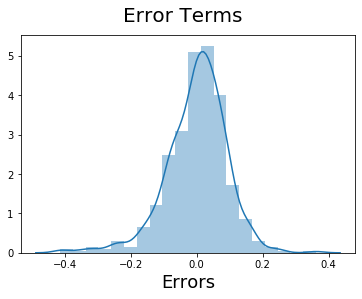

In [109]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [110]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [111]:
y_test = df_test.pop('cnt')
X_test = df_test

In [112]:
X_test.shape

(219, 29)

In [113]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]



In [114]:
X_test_new.columns

Index(['yr', 'windspeed', 'spring', 'summer', 'winter', 'september',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'temp'],
      dtype='object')

In [115]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [116]:
X_test_new.columns

Index(['const', 'yr', 'windspeed', 'spring', 'summer', 'winter', 'september',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'temp'],
      dtype='object')

In [117]:
X_test_new.shape

(219, 10)

In [118]:
# Making predictions
y_pred = lr_10.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

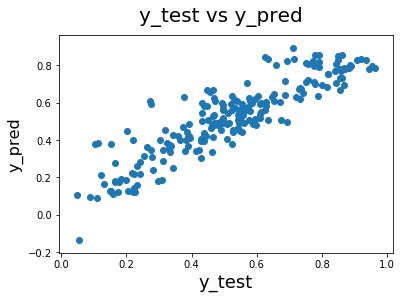

In [119]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

#### Calculating the R-squared score on the test set.

In [120]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8009008674030351

### Final Report

### We can see that the equation of our best fitted line is:
 cnt=0.2344×yr+0.0611×summar+0.0931×winter+0.0872×september+0.4794×temp+(-0.1498)×windspeed+(-0.0577)×spring+(-0.2819)×Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds+(--0.0785)×Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

Temp is highly correlated with cnt when compare to other variable